In [20]:
import numpy as np
import matplotlib.pyplot as plt

def clouds(num_points=100):
    centers = [(1, 1), (-1, -1)]
    spreads = [0.5, 0.7]
    labels = [-1, 1]
    
    X = []
    y = []
    for center, spread, label in zip(centers, spreads, labels):
        X += np.random.multivariate_normal(center, spread * np.identity(2), num_points).tolist()
        y += [label] * num_points
    
    return X, y

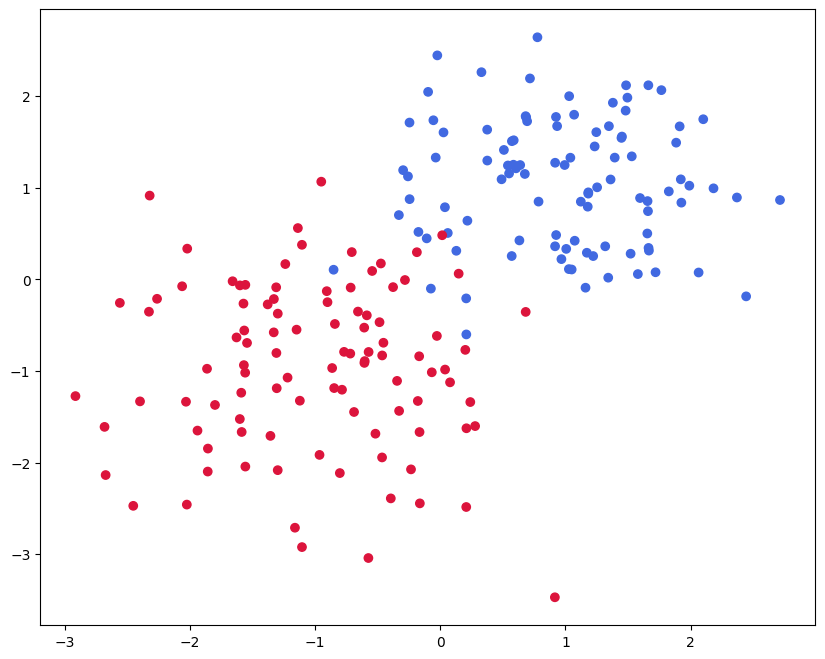

In [21]:
X, y = clouds(100)

colors = ["crimson" if label == 1 else "royalblue" for label in y]
plt.figure(figsize=(10, 8))
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], color=colors)

In [22]:
def loss(support_vector, X, y, penalty=1e5):
    w = support_vector[1:]
    b = support_vector[0]
    
    norm = np.linalg.norm(w) ** 2
    constraint = sum(max(0, 1 - y[i] * (w.dot(X[i]) - b)) for i, _ in enumerate(y))
    
    return norm + penalty * constraint

#### Now minimize the loss

In [23]:
from qiskit.algorithms.optimizers import L_BFGS_B

optimizer = L_BFGS_B()
result = optimizer.minimize(lambda sv: loss(sv, X, y), x0=np.random.random(3))
support_vector = result.x


In [24]:
def classify(point, support_vector):
    w = support_vector[1:]
    b = support_vector[0]
    
    return np.sign(w.dot(point) + b)

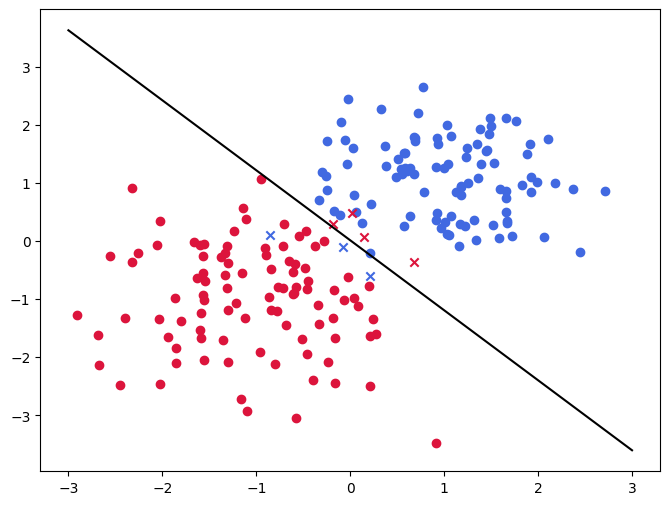

In [25]:
predicted = [classify(point, support_vector) for point in X]
colors = ["crimson" if label == 1 else "royalblue" for label in y]
markers = ["o" if label == predicted_label else "x" for label, predicted_label in zip(y, predicted)]
plt.figure(figsize=(8, 6))
for point, marker, color in zip(X, markers, colors):
    plt.scatter(point[0], point[1], color=color, marker=marker)

b, w = support_vector[0], support_vector[1:]
x1 = np.linspace(-3, 3, num=100)
x2 = -1 / w[1] * (w[0] * x1 - b)
plt.plot(x1, x2, "k-")

In [26]:
from sklearn.svm import SVC

model = SVC()
model.fit(X, y)

sk_predict = model.predict(X)

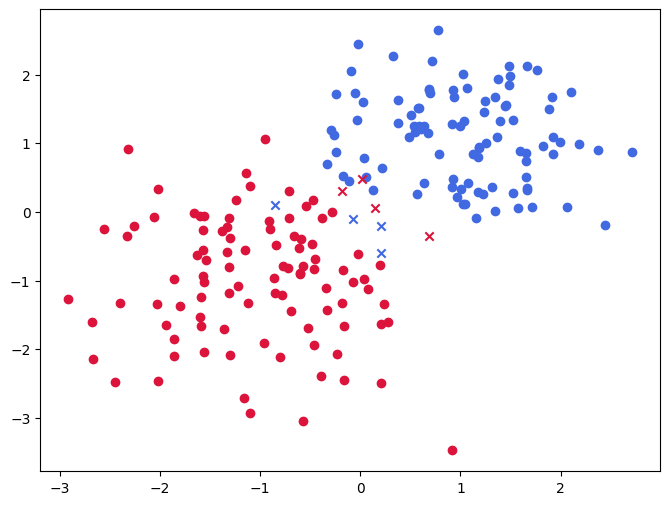

In [27]:
colors = ["crimson" if label == 1 else "royalblue" for label in y]
markers = ["o" if label == predicted_label else "x" for label, predicted_label in zip(y, sk_predict)]
plt.figure(figsize=(8, 6))
for point, marker, color in zip(X, markers, colors):
    plt.scatter(point[0], point[1], color=color, marker=marker)

#### Non-linear data

In [28]:
def circle():
    num_points = 250
    points = 1 - 2 * np.random.random((num_points, 2))
    
    radius = 0.6
    labels = [1 if np.linalg.norm(point) > radius else -1 for point in points]
    
    return points, labels

Text(0, 0.5, '$x_2$')

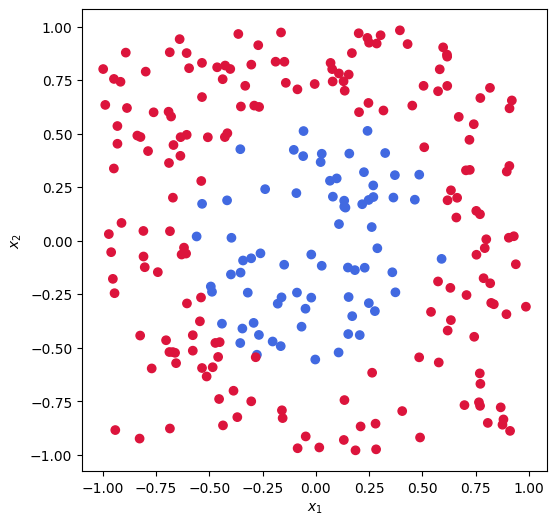

In [29]:
points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], color=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [30]:
def feature_map(x):
    return np.array([x[0], x[1], x[0] ** 2 + x[1] ** 2])

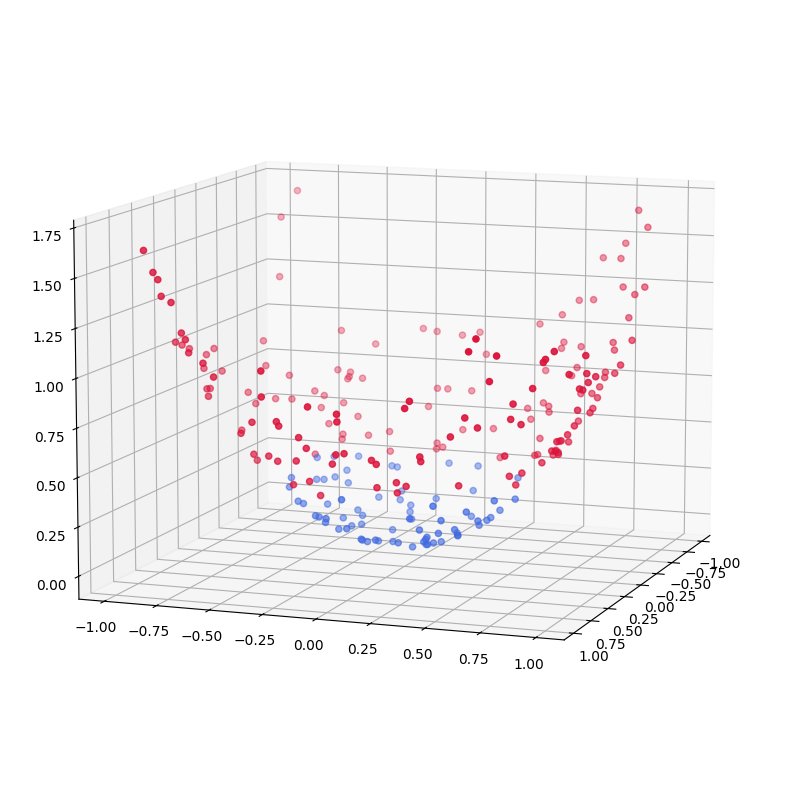

In [31]:
embedded_points = np.array([feature_map(point) for point in points])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(embedded_points[:, 0], embedded_points[:, 1], embedded_points[:, 2], color=colors)
ax.view_init(10, 20)

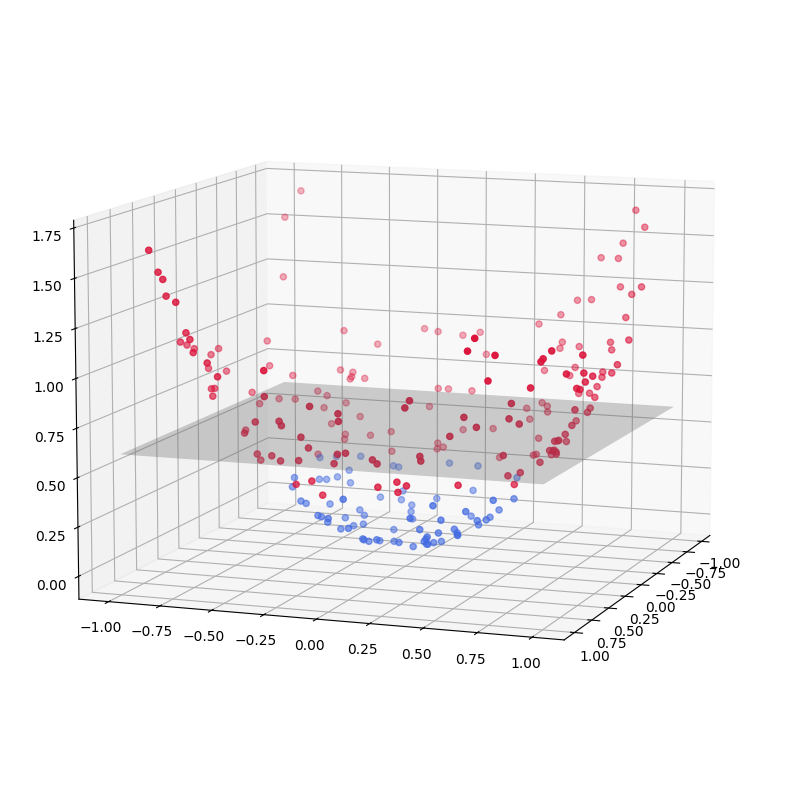

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(embedded_points[:, 0], embedded_points[:, 1], embedded_points[:, 2], color=colors)

x, y = np.meshgrid([1, -1], [1, -1])
ax.plot_surface(x, y, 0.6 * np.ones_like(x), alpha=0.3, color="grey")

ax.view_init(10, 20)

Text(0, 0.5, '$x_2$')

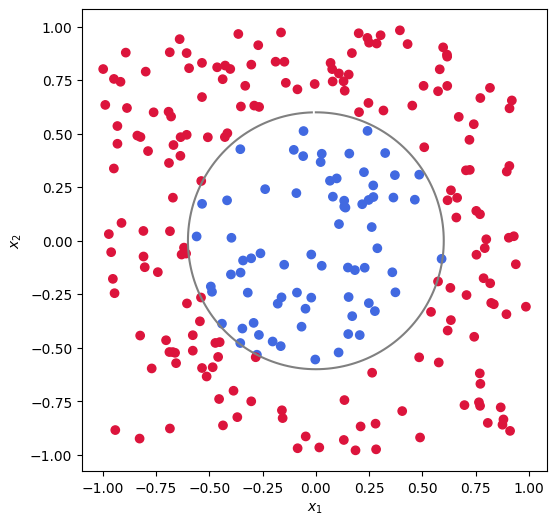

In [33]:
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], color=colors)

angles = np.linspace(0, 2 * np.pi, num=200, endpoint=False)
x = 0.6 * np.sin(angles)
y = 0.6 * np.cos(angles)
plt.plot(x, y, color="grey")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")